# **Importing necessary libraries**

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn import tree

# **Read Data**

In [23]:
df = pd.read_csv('Iris.csv',index_col = 'Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# **Check missing data**

In [24]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

# **Check Data Balance**

In [30]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# **Check Data Types**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## **Statistical Analysis**

In [34]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Sepal length vs Sepal width**

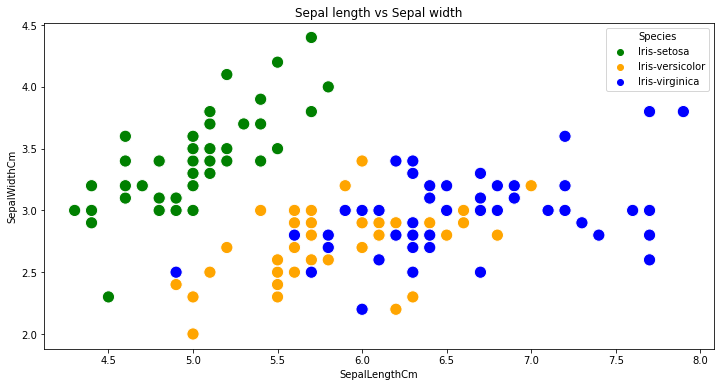

In [35]:
plt.figure(figsize=(12,6))
plt.title("Sepal length vs Sepal width")
sns.scatterplot(x=df["SepalLengthCm"],
                y=df["SepalWidthCm"],
                hue=df["Species"],
                palette=["green","orange","blue"],
                s=150)
plt.show()

## **Petal length vs Petal width**

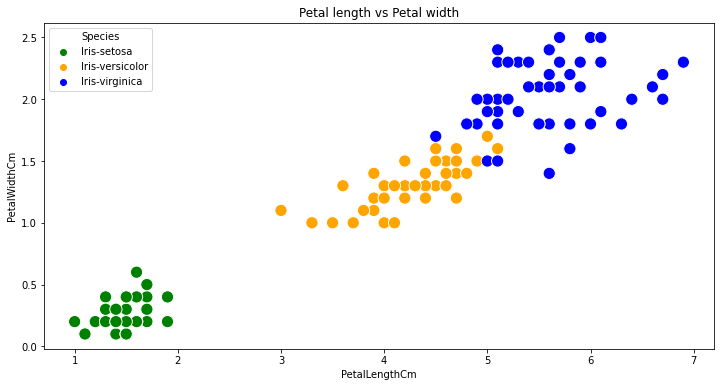

In [37]:
plt.figure(figsize=(12,6))
plt.title("Petal length vs Petal width")
sns.scatterplot(x=df["PetalLengthCm"],
                y=df["PetalWidthCm"],
                hue=df["Species"],
                palette=["green","orange","blue"],
                s=150)
plt.show()

## **Species Count Percentage**

In [39]:
value = df.Species.value_counts().values
names = df.Species.value_counts().index
fig = px.pie(df, values=value, names=names, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## **Species Count**

In [42]:
fig = go.Figure(data=[go.Bar(
            x=names, y=value,
            text=value,
            textposition='auto',
        )])

fig.show()

# **Check for Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

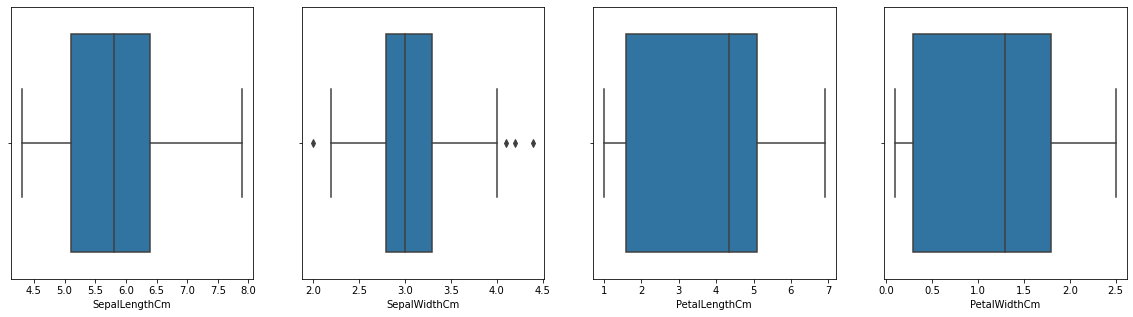

In [25]:
plt.figure(figsize=(20,5))
j = 1
for i in df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.boxplot(df[i])
    j+=1

# **Distribution Check**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

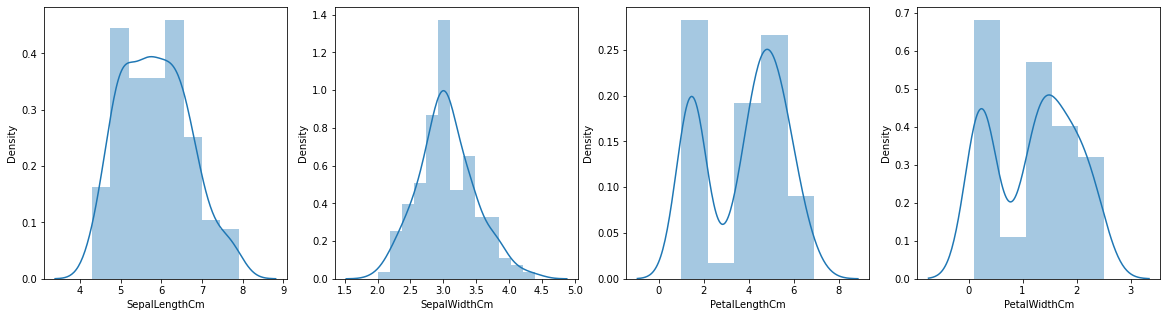

In [27]:
plt.figure(figsize=(20,5))
j = 1
for i in df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.distplot(df[i])
    j+=1

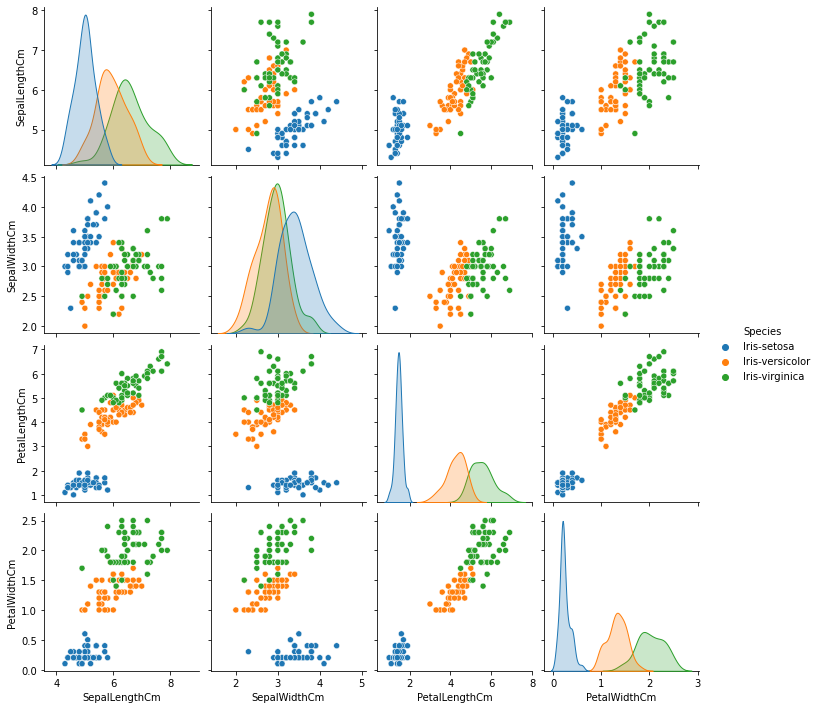

In [28]:
sns.pairplot(df,hue='Species')
plt.show()

# **Correlation Matrix**

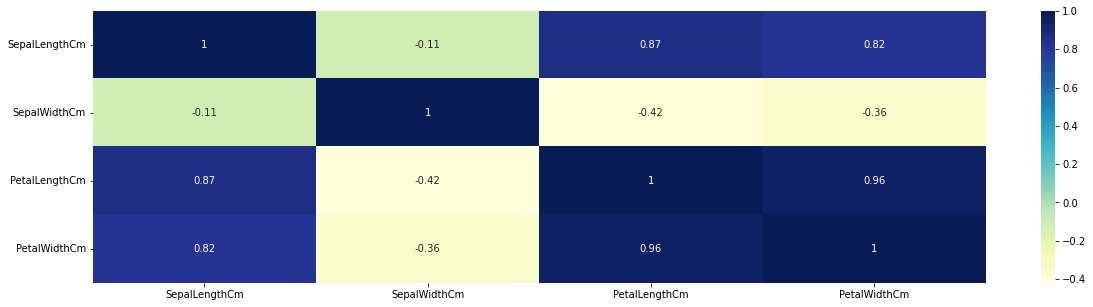

In [45]:
fig, ax = plt.subplots(figsize=(20,5))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

## **Data Spliting**

In [46]:
X=df[["SepalLengthCm","SepalWidthCm",'PetalLengthCm','PetalWidthCm']]
y=df[["Species"]]

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=df.Species)

## **Build Model**

In [48]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

## **Model Predict**

In [50]:
y_predict=model.predict(X_test)

## **Model Evaluation**

In [55]:
a=accuracy_score(y_predict,y_test)
print('Accuracy Score=',a*100,'%')
print('Confusion Matrix is\n',confusion_matrix(y_test,y_predict))

Accuracy Score= 93.33333333333333 %
Confusion Matrix is
 [[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


## **Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



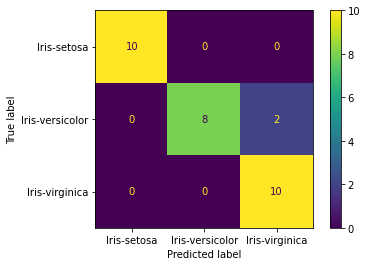

In [58]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

## **Classification Report**

In [60]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



# **Tree Graphically Visualize**

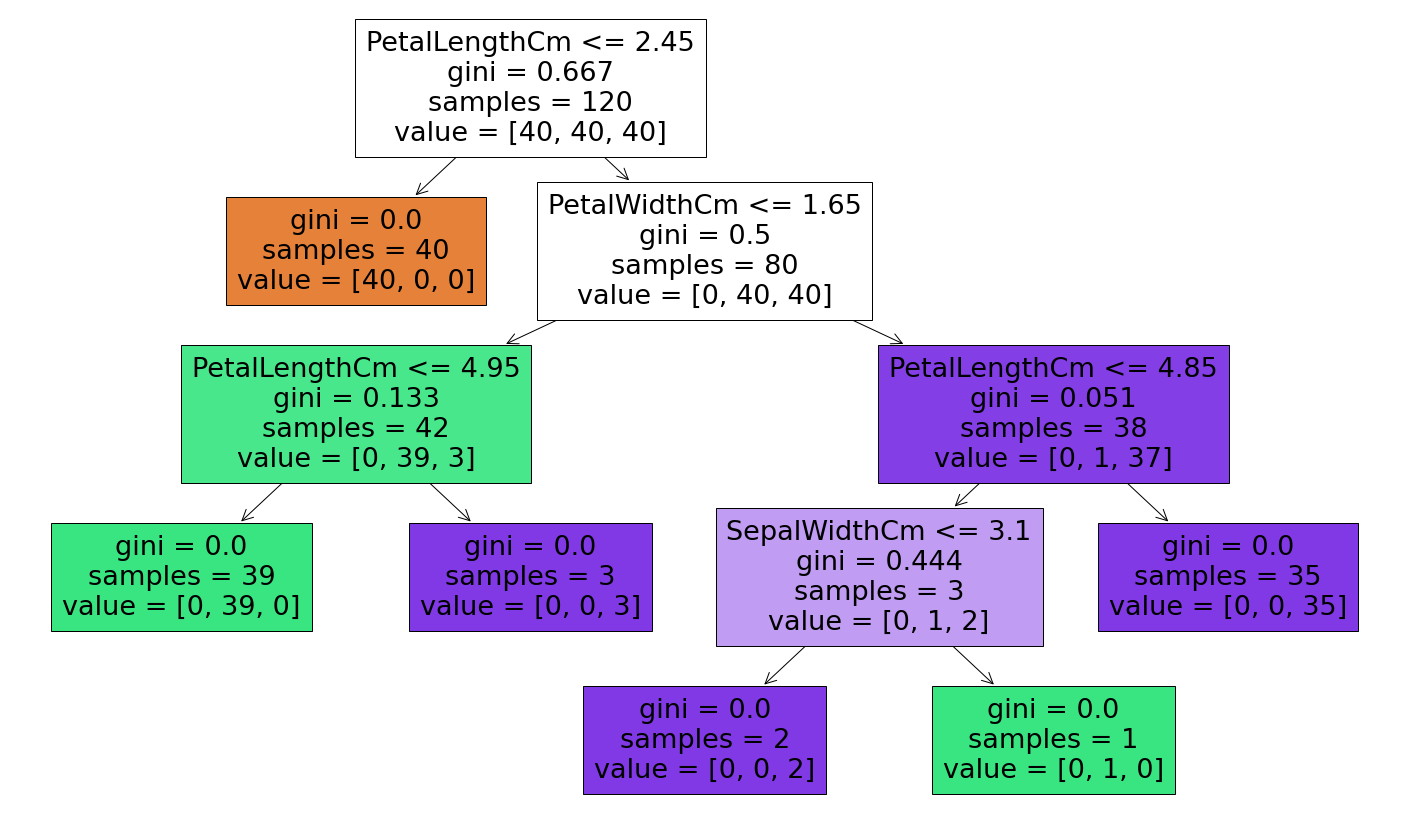

In [64]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model, feature_names=df.columns, filled=True)
plt.show()